### Ajuste curvas sobre fuerza laboral de mujeres en México
Integrante 1: Juan Enrique Aguirre

Integrante 2: Pablo García Bedoy

In [91]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sym

import scipy.optimize as opt

In [92]:
file_name = 'female_labor.csv'
data = pd.read_csv(file_name)
data

,Consecutivo,Indicator Name,"Labor force, female (% of total labor force)"
0,1,1990,29.409270
1,2,1991,29.779579
2,3,1992,30.255098
3,4,1993,30.779728
4,5,1994,31.332324
5,6,1995,32.520875
6,7,1996,32.438060
7,8,1997,33.418742
8,9,1998,33.276704
9,10,1999,32.974866


A continuación usaremos el consecutivo como variable independiente  𝑥  y el porcentaje de mujeres trabjando como variable dependiente  𝑦. Asimismo, ajustaremos polinomios de grado 1 hasta grado 5.

In [93]:
x = data.iloc[:,0].values
y = data.iloc[:,2].values

In [94]:
def fun_obj(beta,x,y,n):
    yhat = beta.dot([x**i for i in range(n+1)])
    e = y-yhat
    return np.sum(e**2)

In [95]:
b01 = np.zeros(2)
b02 = np.zeros(3)
b03 = np.zeros(4)
b04 = np.zeros(5)

polgrad1 = opt.minimize(fun_obj,b01,args=(x,y,1))
polgrad2 = opt.minimize(fun_obj,b02,args=(x,y,2))
polgrad3 = opt.minimize(fun_obj,b03,args=(x,y,3))
polgrad4 = opt.minimize(fun_obj,b04,args=(x,y,4))

In [96]:
polgrad1

      fun: 11.35754779986876
 hess_inv: array([[ 0.0726601 , -0.00369458],
       [-0.00369458,  0.00024631]])
      jac: array([-8.34465027e-07, -4.76837158e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([30.10666428,  0.28637003])

In [97]:
polgrad2

      fun: 5.209722889580083
 hess_inv: array([[ 1.78686331e-01, -2.42154806e-02,  6.84020261e-04],
       [-2.42154806e-02,  4.21818712e-03, -1.32396501e-04],
       [ 6.84020261e-04, -1.32396501e-04,  4.41326542e-06]])
      jac: array([6.25848770e-06, 3.38131189e-03, 1.40166461e-01])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 336
      nit: 5
     njev: 65
   status: 2
  success: False
        x: array([ 2.89647385e+01,  5.07386418e-01, -7.36718588e-03])

In [98]:
polgrad3

      fun: 5.009356445204979
 hess_inv: array([[ 3.61584058e-01, -9.16944357e-02,  6.21279471e-03,
        -1.22861032e-04],
       [-9.16944357e-02,  2.91193869e-02, -2.17272293e-03,
         4.53410781e-05],
       [ 6.21279471e-03, -2.17272293e-03,  1.71594258e-04,
        -3.71521320e-06],
       [-1.22861032e-04,  4.53410781e-05, -3.71521320e-06,
         8.25626629e-08]])
      jac: array([-3.45706940e-06, -2.62856483e-05, -2.46405602e-04,  1.10864639e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 522
      nit: 8
     njev: 85
   status: 2
  success: False
        x: array([ 2.92400795e+01,  4.05760702e-01,  9.59947089e-04, -1.85051294e-04])

In [99]:
polgrad4

      fun: 3.962211556788203
 hess_inv: array([[ 6.72150436e-01, -2.71593252e-01,  3.21395628e-02,
        -1.45150084e-03,  2.21439947e-05],
       [-2.71593252e-01,  1.33405382e-01, -1.72047674e-02,
         8.15693881e-04, -1.28390673e-05],
       [ 3.21395628e-02, -1.72047674e-02,  2.33860768e-03,
        -1.14773429e-04,  1.85095821e-06],
       [-1.45150084e-03,  8.15693881e-04, -1.14773429e-04,
         5.77430178e-06, -9.48615617e-08],
       [ 2.21439947e-05, -1.28390673e-05,  1.85095821e-06,
        -9.48615617e-08,  1.58100628e-09]])
      jac: array([  0.63003412,   2.56947759,  31.47297251, 313.09920603,
        -7.20728356])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 747
      nit: 7
     njev: 105
   status: 2
  success: False
        x: array([ 2.80332527e+01,  1.15360875e+00, -1.09626476e-01,  5.56222641e-03,
       -9.66538469e-05])

In [100]:
beta1 = polgrad1.x
beta2 = polgrad2.x
beta3 = polgrad3.x
beta4 = polgrad4.x

In [101]:
yhat1 = beta1[0] + beta1[1]*x
yhat2 = beta2[0] + beta2[1]*x + beta2[2]*x**2
yhat3 = beta3[0] + beta3[1]*x + beta3[2]*x**2 + beta3[3]*x**3
yhat4 = beta4[0] + beta4[1]*x + beta4[2]*x**2 + beta4[3]*x**3 + beta4[4]*x**4 

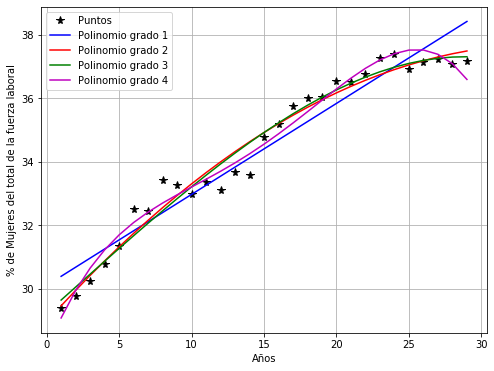

In [103]:
plt.figure(figsize=(8,6))
plt.plot(x,y,'k*',ms = 8,label='Puntos')
plt.plot(x,yhat1,'b',ms = 8,label='Polinomio grado 1')
plt.plot(x,yhat2,'r',ms = 8,label='Polinomio grado 2')
plt.plot(x,yhat3,'g',ms = 8,label='Polinomio grado 3')
plt.plot(x,yhat4,'m',ms = 8,label='Polinomio grado 4')

plt.grid()
plt.legend(loc='best')
plt.xlabel('Años')
plt.ylabel('% de Mujeres del total de la fuerza laboral')
plt.show()

Text(0, 0.5, 'Error')

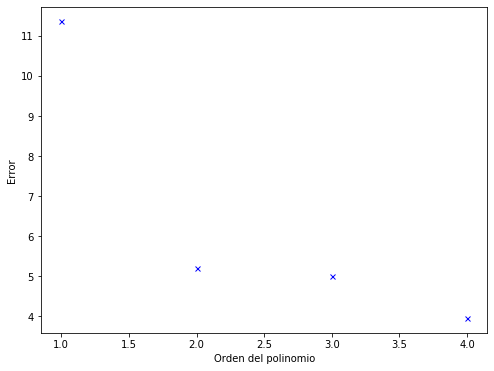

In [104]:
error = [polgrad1.fun,polgrad2.fun,polgrad3.fun,polgrad4.fun]
plt.figure(figsize=(8,6))
plt.plot(range(1,5),error,'bx',ms=5)
plt.xlabel('Orden del polinomio')
plt.ylabel('Error')

*Conclusión*

Según la gráfica de los errores del polinomio de grado 1 al 4, podemos concluir que, el polinomio que mejor se ajusta es el de cuarto orden. Ya que representa el error mínimo (el valor más cercano a 0). Mientras que el polinomio de grado 1, su error es muy grande, como lo apreciamos en la pasada gráfca; y el polinomio de grado 2 ya es menor su error al igual que el del polinomio de grado 3, pero el del polinomio de grado 4 sigue siendo una mucho mejor aproximación.  


Ahora, en base a los polinomios ajustados en el punto anterior, estimaremos las mujeres trabajando en el año 2017 y 2018 y compararemos con el dato real 37.0866419% y 37.168404%, respectivamente.

In [105]:
x = 28
yhat1 = beta1[0] + beta1[1]*x
yhat2 = beta2[0] + beta2[1]*x + beta2[2]*x**2
yhat3 = beta3[0] + beta3[1]*x + beta3[2]*x**2 + beta3[3]*x**3
yhat4 = beta4[0] + beta4[1]*x + beta4[2]*x**2 + beta4[3]*x**3 + beta4[4]*x**4


yhat1,yhat2,yhat3,yhat4,37.0866419

(38.12502522270638,
 37.39568444510757,
 37.291731678997145,
 37.080267436271356,
 37.0866419)

In [106]:
x = 29
yhat1 = beta1[0] + beta1[1]*x
yhat2 = beta2[0] + beta2[1]*x + beta2[2]*x**2
yhat3 = beta3[0] + beta3[1]*x + beta3[2]*x**2 + beta3[3]*x**3
yhat4 = beta4[0] + beta4[1]*x + beta4[2]*x**2 + beta4[3]*x**3 + beta4[4]*x**4

yhat1,yhat2,yhat3,yhat4,37.168404

(38.4113952563052,
 37.483141267863246,
 37.301239361712625,
 36.5877502213083,
 37.168404)

*Conclusión*. 

Una vez más, podemos corroborar que el polinomio que tiene menor error es el polinomio de grado 4, porque el polinomio que mejor estima el dato del 2017 y 2018 es el polinomio de grado cuatro.
Quizá pueda parecer que el polinomio de grado 3 estima mejor el dato en el 2018. Sin embargo, hay que recordar que estos datos forman una gráfica que tiene altas y bajas. Esto significa, que el polinomio de grado 4, es el polinomio que más se acerca, en general, a lo que es el polinomio que determina los datos de 1990 a 2018. Es por esto, que pusimos que calculara datos de 2017 y 2018; y como se observo, en el 2017 sí se acerca demasiado al dato real, pero en 2018 el polinomio de grado 3 tiene una mejor aproximación al dato real que el polinomio de grado 4. Esto no quiere decir, como ya mencionamos anteriormente, que el polinomio de grado 3 sea mejor que el de grado 4, simplemente en este dato su aproximación es mejor que el de grado 4.

Ahora, en base al polinomio de grado 4, estimaremos las mujeres trabajando en el año 2019 como predicción basada en la base de datos que tenemos.

In [107]:
x = 30

yhat4 = beta4[0] + beta4[1]*x + beta4[2]*x**2 + beta4[3]*x**3 + beta4[4]*x**4

yhat4

35.86818351831087

*Conclusión*

Ahora, con base en el polinomio de grado 4, de acuerdo al modelo que hicimos, en 2019 habrá una fuerza laboral de mujeres del 35.86%. Esta predicción es con un error del 3.96%.
